<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Прежде, чем приступать к пунктам проекта, загружу библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Загрузка данных

Загружаю файл и смотрю информацию о нём.

In [ ]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
insurance.head(15)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Пропусков нет. Изменю тип данных для возраста. Вряд-ли кто-то в данном случае. будет указывать возраст с точностью до десятых. Поэтому вещественный тип не нужен.

In [ ]:
try:
    insurance['Возраст'] = insurance['Возраст'].astype('int')
    print('Всё получилось')
except:
    print('К сожалению, преобразование не удалось')

Всё получилось


In [ ]:
insurance.head(15)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
5,1,43,41000.0,2,1
6,1,39,39700.0,2,0
7,1,25,38600.0,4,0
8,1,36,49700.0,1,0
9,1,32,51700.0,1,0


Зарплату трогать не буду. Проверю на дубликаты.

In [ ]:
insurance.duplicated().sum()

153

С одной стороны, вполне возможно, что есть клиенты одного возраста с одной зарплатой, одинаковым количеством членов семьи и т.д. С другой стороны, количество дубликатов составляет 3% от общего числа данных. Поэтому, я их удалю.

In [ ]:
insurance.drop_duplicates(inplace=True)

In [ ]:
insurance.duplicated().sum()

0

Проверю данные на коррелируемость.

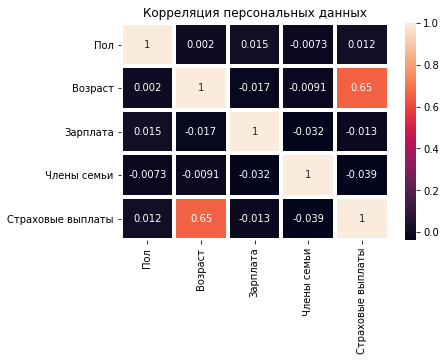

In [ ]:
sb.heatmap(insurance.corr(), annot=True, linewidths=3, linecolor='white')
plt.title('Корреляция персональных данных')
plt.show()

Есть некая взаимосвязть страховых выплат и возраста, но она не абсолютна.

### Промежуточные выводы

На первом этапе:
1. Загружен файл;
2. Проверено его содержимое;
3. Изменён тип данных в столбце возраст на целочисленный;
4. Устранены дубликаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw                                       (2.1)
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)    (2.2)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y       (2.3)
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново).

**Ответ:** не изменится.

**Обоснование:** Для обоснования утверждения о неизменности качества линейной регрессии рассмотрим матрицу Y, являющуюся произведением матрицы Х на обратимую матрицу. Сделаю оговорку, что размерность матрицы признаков принимаю 5000 на 4 (как и дата-файл до удаления дубликатов), размерностб обратимой матрицы - 4 на 4.

$$
Y = XP
$$

Подставим Y вместо Х в уравнения (2.1) и (2.3). Получаем соответственно:

$$
a_1 = Yw_1
$$

$$
w_1 = (Y^TY)^{-1}Y^Ty
$$

Подставлю выражение для вектора весов в уравнение для предсказаний.

$$
a_1 = Y(Y^TY)^{-1}Y^Ty
$$

Теперь Y распишу как произведение матрицы Х на обратимую матрицу:

$$
a_1 = XP((XP)^TXP)^{-1}(XP)^Ty
$$

Применю ряд свойств:
1. Произведение квадратной матрицы на матрицу, обратную ей даёт единичную матрицу:

$$
PP^{-1} = E
$$

2. Транспонирование приизведения матриц есть произведение траеспонированных матриц, взятых в обратном порядке:

$$
(AB)^T = B^TA^T
$$

3. Обратная матрица от произведения есть произведение обратных матриц, взятых в обратном порядке:

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

Применив транспонирование матриц, получаю:

$$
a_1 = XP((P^TX^TXP)^{-1})P^TX^Ty
$$

В скобках, от которых берётся обратная матрица, есть следующие множители:
1. Квадратная матрица 4х4 - P;
2. Матрица Х - размером 5000х4;
3. Транспонированная матрица Х размером 4х5000.
Есть ещё одно свойство матриц:
$$
A(BC) = (AB)C
$$
Обратную матрицу можжно взять от квадратной, поэтому, группируем множители так, чтобы за скобки ушли квадратные матрицы.


Получается:

$$
a_1 = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$


Убираю единичные матрицы. Остаётся:

$$
a_1 = (X^TX)^{-1}X^Ty
$$


То есть,

$$
a_1 = Xw
$$

Что и требовалось доказать. Домножение признаков на обратимую матрицу не влияет на предсказания, то есть на качество линейной регрессии.

### Промежуточные выводы

Дан ответ на вопрос Изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу? Не изменится. Приведено доказательство.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования использую умножение матрицы X (признаков) на случайную (генерируется случайным образом) обратимую матрицу P размером 4х4. Создам модель линейной регрессии для исходных признаков и посчитаю метрику R2. Аналогично поступлю для преобразованных признаков. Метрики R2 должны быть равны для обоих случаев.

**Обоснование**

В качестве обоснование применяю доказательство в пункте № 2. Умножение признаков на квадратную обратимую матрицу не влияет на предсказания.

## Проверка алгоритма

Для начала создам признаки и целевой признак.

In [ ]:
features=insurance.drop(['Страховые выплаты'],axis=1)
target=insurance['Страховые выплаты']

Разобью данные на обучающую и тестовую выборки.

In [ ]:
train_features, test_features, \
train_target, test_target = train_test_split(features,target, test_size=0.25, random_state=12345)


Проверю размеры выборок.

In [ ]:
train_size=train_features.shape[0]/features.shape[0]
test_size=test_target.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_size))
print('Размер тестовой выборки - {:.0%}'.format(test_size))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


Создам и обучу модель на исходных признаков. Определю для неё коэффициент детерминации и среднеквадратическую ошибку.

In [ ]:
model_init = LinearRegression()
model_init.fit(train_features, train_target)
predict = model_init.predict(test_features)

r2_score_init = r2_score(test_target, predict)
MSE_init = mean_squared_error(predict,test_target)

print("Коэффициент детерминации для исходных признаков:", r2_score_init)
print("Среднеквадратическая ошибка для исходных признаков:", MSE_init)

Коэффициент детерминации для исходных признаков: 0.42307727492147584
Среднеквадратическая ошибка для исходных признаков: 0.11955009374099854


Тепеь создам случайную квадратную матрицу.

In [ ]:
P = np.random.normal(4, size=(4,4))
P

array([[3.96199139, 3.94106601, 3.60862674, 2.84661352],
       [3.95866161, 3.02567255, 4.29743265, 5.80468685],
       [4.53073606, 4.72698729, 5.58427248, 3.679682  ],
       [4.99483464, 4.41026958, 4.61270178, 2.78815665]])

Проверю её на обратимость.

In [ ]:
np.linalg.inv(P)

array([[-0.54397869,  0.18534106, -0.76401806,  1.17783689],
       [ 1.54852059, -0.34138349,  0.21201492, -1.15006554],
       [-1.13641199, -0.0173447 ,  0.68136639,  0.29711195],
       [ 0.40514938,  0.23666217, -0.09391117, -0.42375318]])

Обратная матрица есть. Теперь умножу признаки на свою обратимую матрицу.

In [ ]:
train_mult=train_features.dot(P)
train_mult.columns = train_features.columns
train_mult.head()

,Пол,Возраст,Зарплата,Члены семьи
4599,247045.947573,257714.346671,304472.403442,200710.776676
3882,229867.704310,239781.582492,283294.138286,186786.090392
4705,126960.612449,132432.670529,156467.380404,103173.196708
1400,175978.616301,183549.313459,216871.751391,143044.481975
728,147412.263314,153752.524094,181665.365467,119824.640709


In [ ]:
test_mult = test_features.dot(P)
test_mult.columns = test_features.columns
test_mult.head()

,Пол,Возраст,Зарплата,Члены семьи
1335,213945.753334,223187.331619,263680.110430,173817.344925
3875,298706.145648,311609.224993,368144.682619,242679.640551
166,153736.539995,160357.477928,189461.486233,124941.197474
3003,87607.583468,91357.676464,107953.284057,71249.821747
424,124787.329808,130140.151949,153774.400387,101463.846975


Создам и обучу на них модель. Найду коэффициент детерминации и среднеквадратическую ошибку.

In [ ]:
model_mult = LinearRegression()
model_mult.fit(train_mult,train_target)
predictions_mult= model_mult.predict(test_mult)
r2_score_mult = r2_score(test_target, predictions_mult)
MSE_mult = mean_squared_error(predictions_mult,test_target)
print("Коэффициент детерминации после преобразования:", r2_score_mult)
print("Среднеквадратическая ошибка после преобразования:", MSE_mult)

Коэффициент детерминации после преобразования: 0.4230772749213405
Среднеквадратическая ошибка после преобразования: 0.11955009374102658


Сравню полученные значения со значениями для исходных признаков.

In [ ]:
compare_table = pd.DataFrame(index=['Коэффициент детерминации',
                                    'Среднеквадратическая ошибка'], columns= \
                             ['Изменённая матрица','Исходная матрица'])
compare_table['Изменённая матрица'] = r2_score_mult, MSE_mult
compare_table['Исходная матрица'] = r2_score_init, MSE_init

compare_table.T

,Коэффициент детерминации,Среднеквадратическая ошибка
Изменённая матрица,0.423077,0.11955
Исходная матрица,0.423077,0.11955


Таким образом, показано, что качество линейной регрессии не изменяется до и после преобразования.

## Выводы

1. Загружен файл;
2. Проверено его содержимое;
3. Изменён тип данных в столбце возраст на целочисленный;
4. Устранены дубликаты;
5. Дан ответ на вопрос Изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу? Не изменится. Приведено доказательство.
6. Показан алгоритм, который осуществляет преобразование признаков методом умножения исходных данных на обратимую матрицу.
Результат - новая (изменённая) матрица признаков, которая сохраняет данные неизменными и производит шифровку данных.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования